In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [42]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fMtrans", "fAlpha", "fDist", "class"]
df = pd.read_csv(r'D:\Coading Part\Programming\Learning Tools\Mahine Learning for Everybody\magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fMtrans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [43]:
df['class'].unique()       # gamma, hadrons   

array(['g', 'h'], dtype=object)

In [44]:
df['class'] = (df['class'] == 'g').astype(int) # g = 1

Features:  Parameters to be passed for prediction
Classification: Predicting for future whether Class is Gamma or Hadron. 

In [45]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fMtrans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


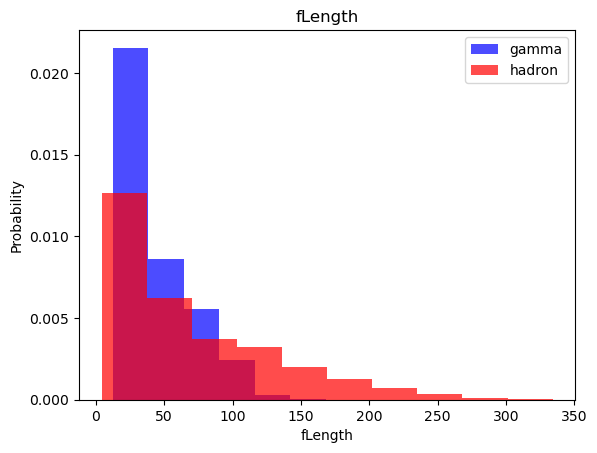

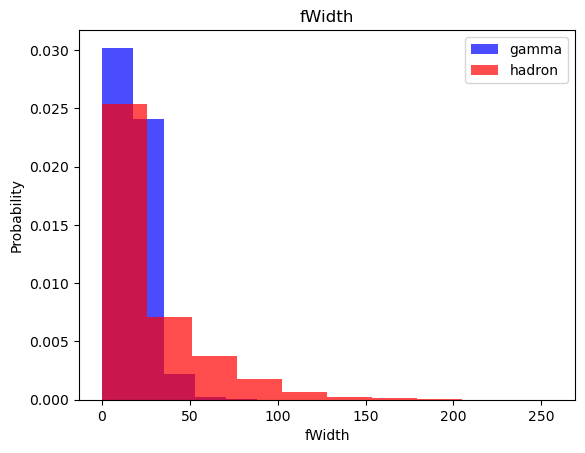

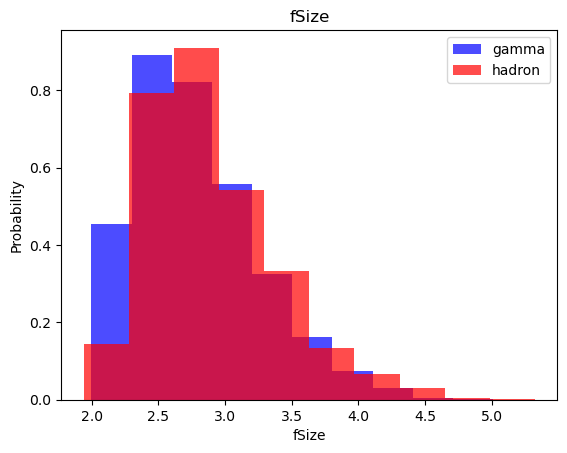

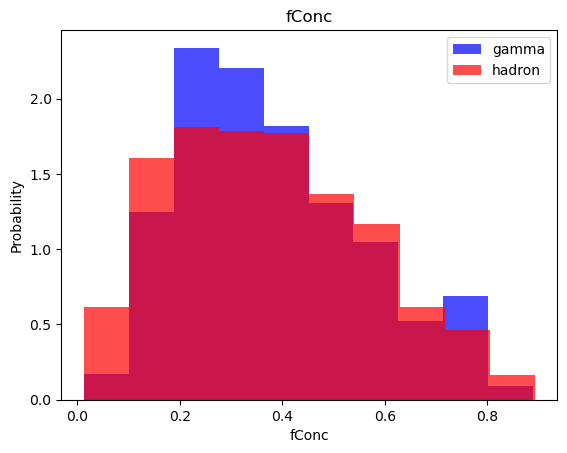

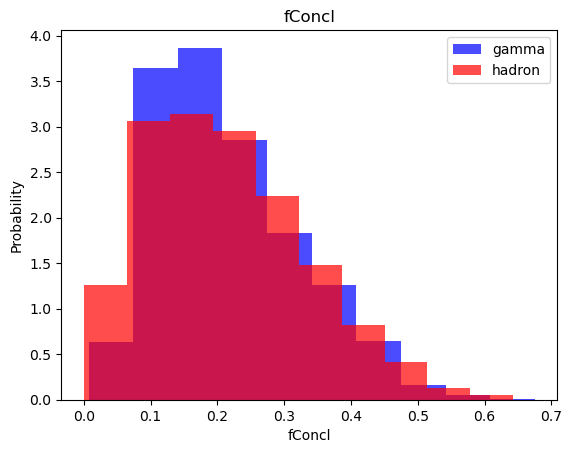

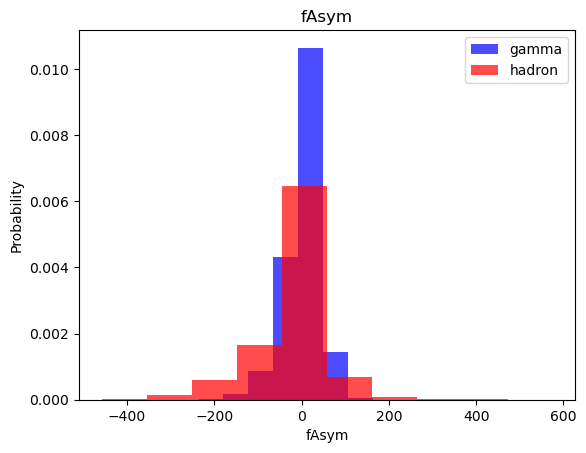

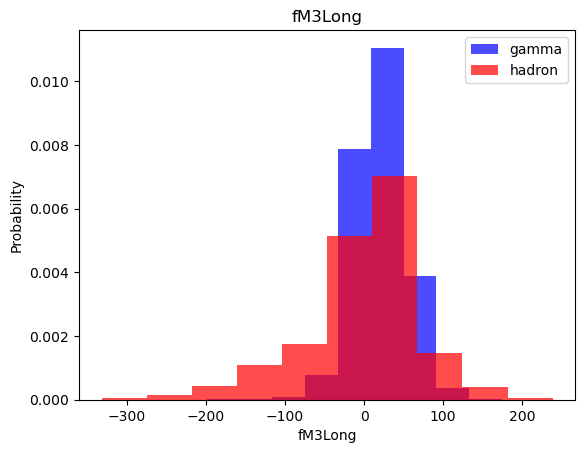

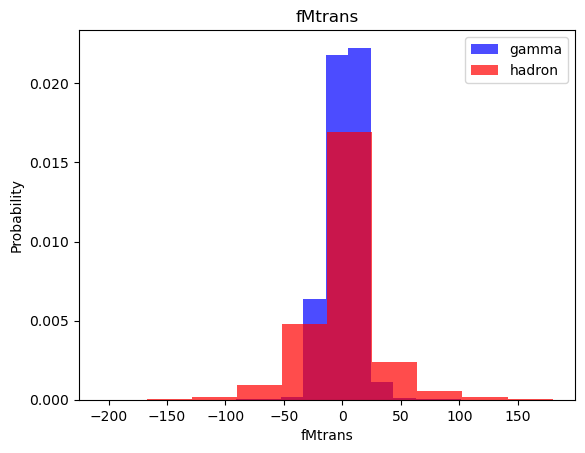

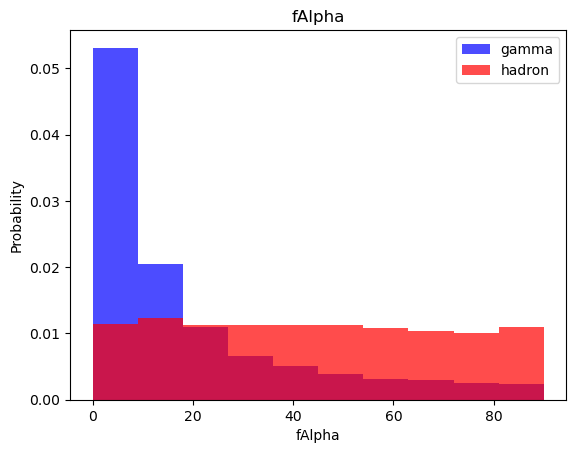

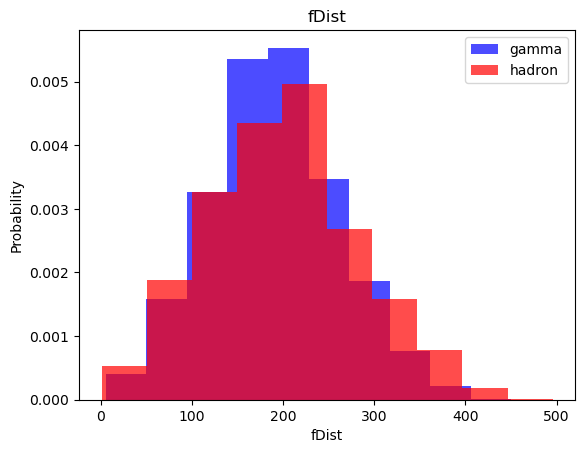

In [46]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets

In [47]:
#                                 fraction of rows          0-60    60-80    80-100
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) 

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [48]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y =  dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    # side by side 
    data = np.hstack((X, np.reshape(y, (-1, 1))))    # 2d arrat
    
    return data, X, y

In [49]:
train

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fMtrans,fAlpha,fDist,class
6959,20.9417,12.0477,2.3589,0.5208,0.2648,-2.3973,9.9103,-10.8915,1.0110,147.215,1
7098,12.7256,11.6640,2.0354,0.7189,0.3733,-15.3439,6.7030,11.3405,58.2737,241.680,1
8122,27.3084,21.3570,2.6101,0.3018,0.1509,-18.5946,14.6071,16.4383,38.1711,123.343,1
10066,77.5391,28.2103,3.8890,0.1307,0.0658,50.7049,76.7223,14.6926,2.9112,233.403,1
6568,24.9532,13.5162,2.5977,0.4116,0.2109,-0.3581,-19.7851,7.9345,5.8810,244.399,1
...,...,...,...,...,...,...,...,...,...,...,...
7121,30.8216,10.2465,2.3901,0.4644,0.2546,-41.7539,15.4014,6.6259,28.6827,186.946,1
2152,31.7847,27.1539,2.9791,0.2697,0.1495,14.9426,-22.2961,-22.7852,10.4772,221.642,1
5557,13.3605,10.5168,2.1833,0.7934,0.4033,14.8849,2.5413,-11.8987,43.4850,230.569,1
3237,54.1138,12.2997,2.6314,0.3622,0.1951,35.4775,50.2178,-8.8637,2.9862,262.324,1


In [50]:
print(len(train[train['class'] == 1])) #gamma
print(len(train[train['class'] == 0]))

7398
4014


Since the hadron values are less,   We are OVERSAMPLING the training data set, so that 4000 matches 7000

In [51]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) # Data havent seen yet, 
test, X_test, y_test = scale_dataset(test, oversample=False)   # Don't want to oversample that

In [52]:
len(y_train)

14796

In [53]:
sum(y_train == 1) # gamma

7398

In [54]:
sum(y_train == 0) # hadron

7398

## Models

### kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=3)  # Make a model
# knn_model = KNeighborsClassifier(n_neighbors=1)  # Make a model
knn_model.fit(X_train, y_train)   # fit a model ( implement kNN )

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = knn_model.predict(X_test)  # Predicti on test dataset

In [58]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
y_test     # ( got 4/6 correct )

array([0, 1, 1, ..., 1, 1, 1])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1362
           1       0.85      0.85      0.85      2442

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [63]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1362
           1       0.73      0.89      0.80      2442

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.69      3804



## Log Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [66]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1362
           1       0.84      0.82      0.83      2442

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## SVM 
Really Powerful


In [67]:
from sklearn.svm import SVC  # Support Vector Class

In [68]:
svm_model = SVC()       # Change param for Production Model
svm_model = svm_model.fit(X_train, y_train)

In [69]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1362
           1       0.88      0.89      0.89      2442

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.86      3804



### Neural Net ( using Tensorflow )

In [70]:
# !pip install tensorflow
import tensorflow as  tf

In [71]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [72]:
nn_model = tf.keras.Sequential([     # Means Layer all passed things into linear stack of layers as a model
    # tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),      # Hyperparameters 64, 32
    # tf.keras.layers.Dropout()   # Prevent overfitting,       randomly choose certain nodes, skip them
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Hyperparameters we can tune
layers, batch size, epochs, Optimizer learning rate(0.001)

In [73]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2
)
# verbose = 0 ( no printing  )

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7701 - loss: 0.5028 - val_accuracy: 0.6777 - val_loss: 0.5959
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.3632 - val_accuracy: 0.6801 - val_loss: 0.5971
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3429 - val_accuracy: 0.7414 - val_loss: 0.5049
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.3269 - val_accuracy: 0.7357 - val_loss: 0.5115
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3275 - val_accuracy: 0.7501 - val_loss: 0.4907
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3199 - val_accuracy: 0.7457 - val_loss: 0.4829
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3138 - val_accuracy: 0.7856 - val_loss: 0.4219
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8697 - loss: 0.3132 - val_accu

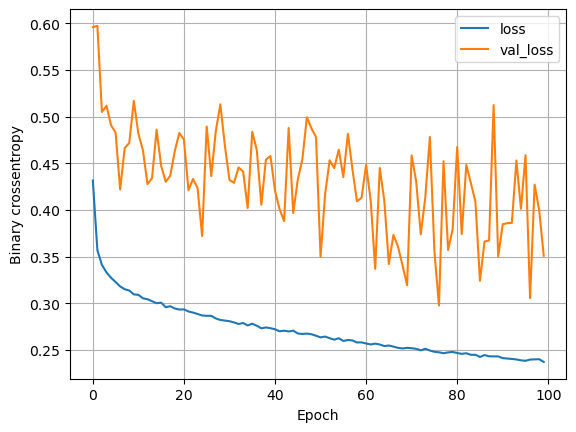

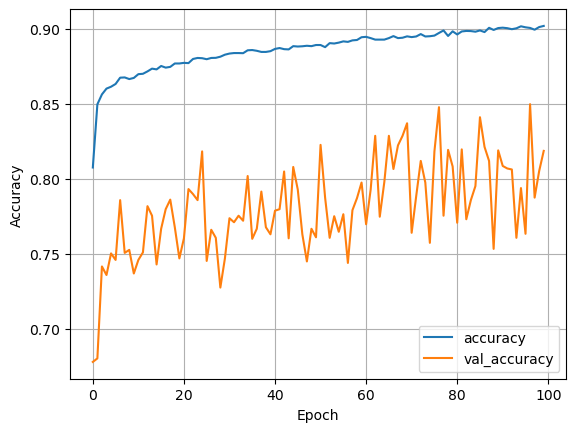

In [74]:
plot_loss(history)
plot_accuracy(history)

Making a function

In [75]:
# Now making a funtion
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([     # Means Layer all passed things into linear stack of layers as a model
    # tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),      # Hyperparameters 64, 32
    tf.keras.layers.Dropout(dropout_prob),   # Prevent overfitting,       randomly choose certain nodes, skip them
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),   # Probability of turning of a node
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    
    return nn_model, history


In [78]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

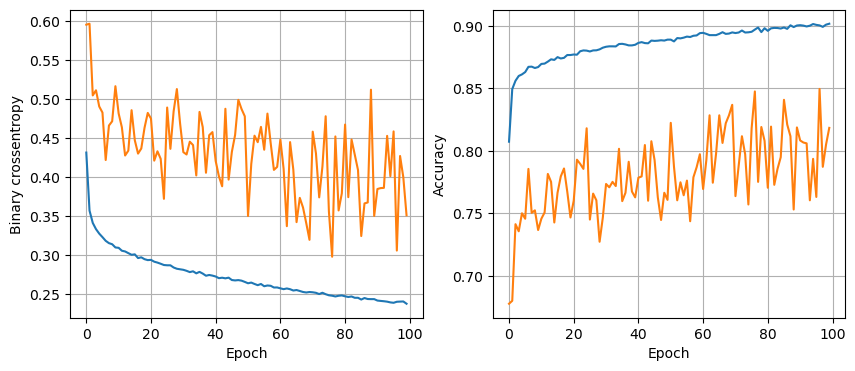

In [79]:
plot_history(history)

16 nodes, dropout 0, lr 0.01, batch size 32


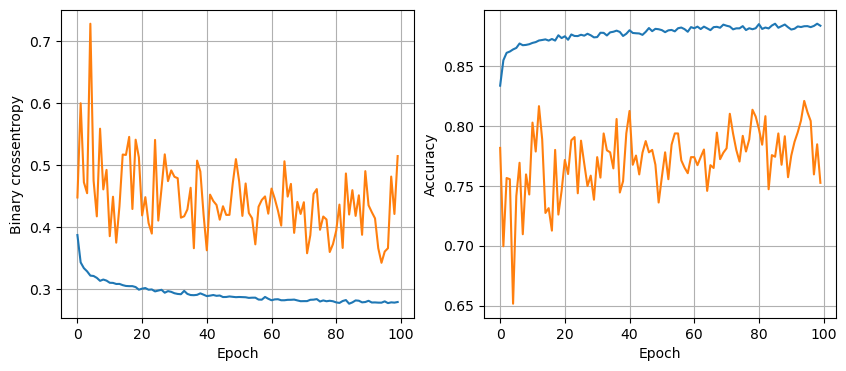

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8628 - loss: 0.3355
16 nodes, dropout 0, lr 0.01, batch size 64


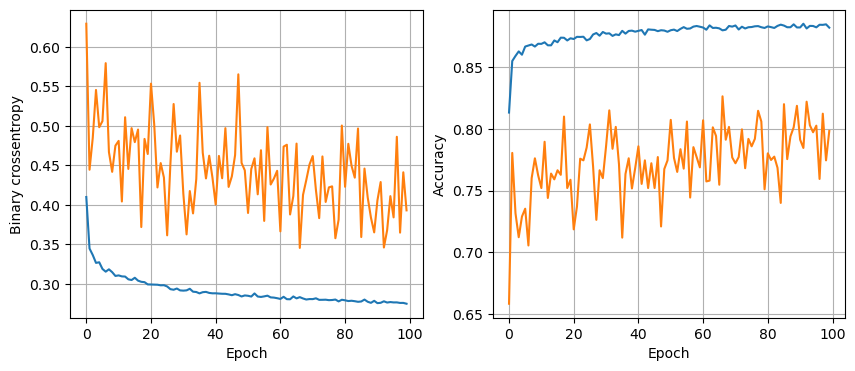

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.3074
16 nodes, dropout 0, lr 0.01, batch size 128


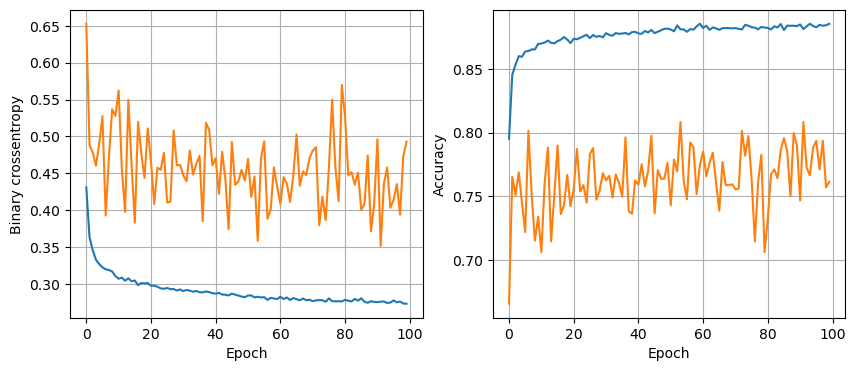

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3229
16 nodes, dropout 0, lr 0.005, batch size 32


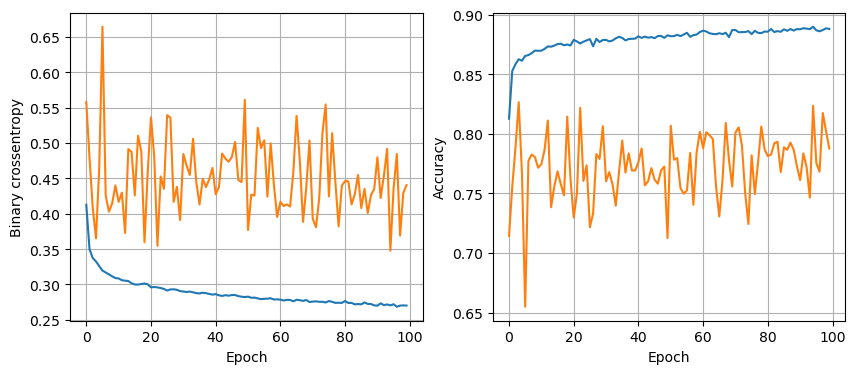

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3103
16 nodes, dropout 0, lr 0.005, batch size 64


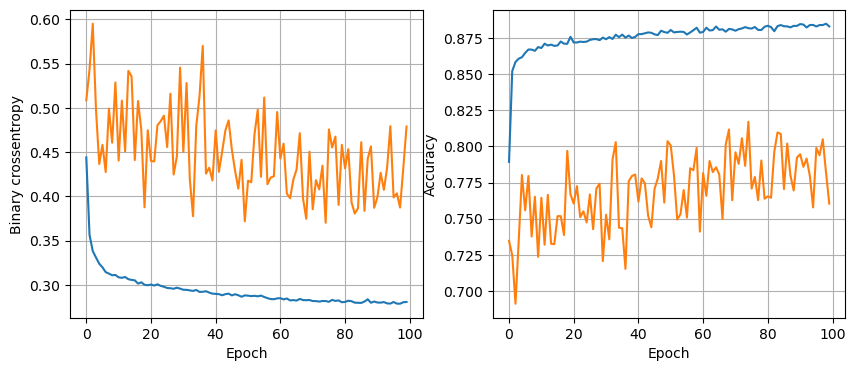

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.3118
16 nodes, dropout 0, lr 0.005, batch size 128


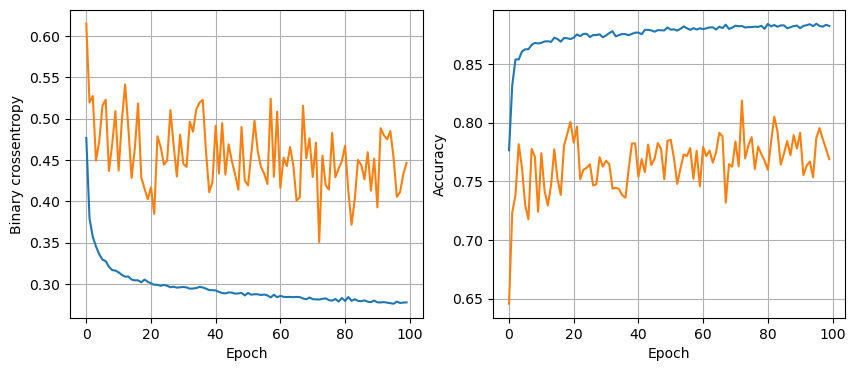

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8755 - loss: 0.3009
16 nodes, dropout 0, lr 0.001, batch size 32


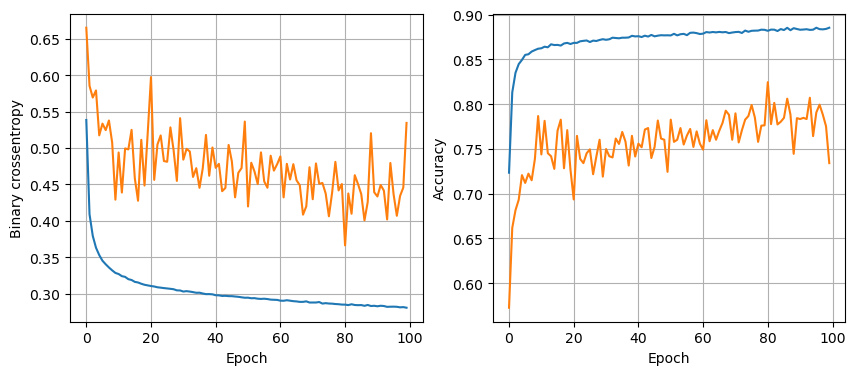

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8678 - loss: 0.3049
16 nodes, dropout 0, lr 0.001, batch size 64


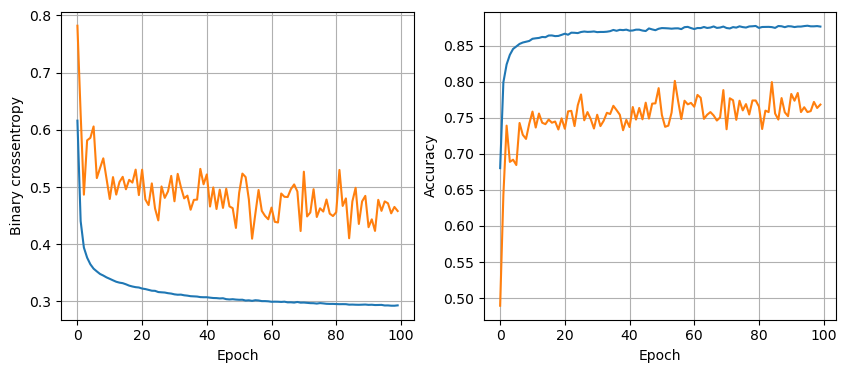

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3066
16 nodes, dropout 0, lr 0.001, batch size 128


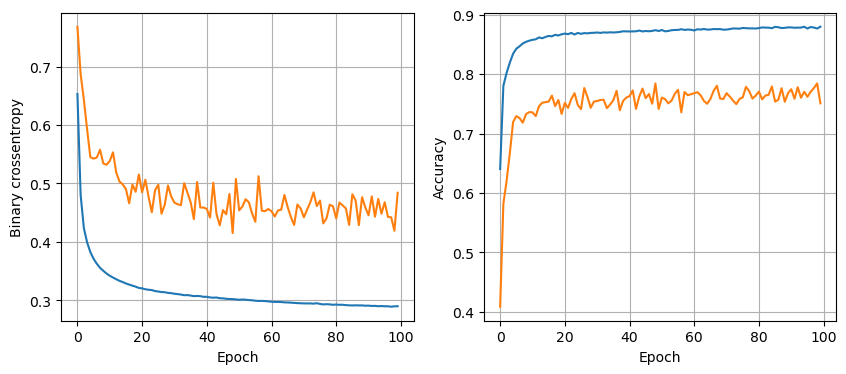

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3044
16 nodes, dropout 0.2, lr 0.01, batch size 32


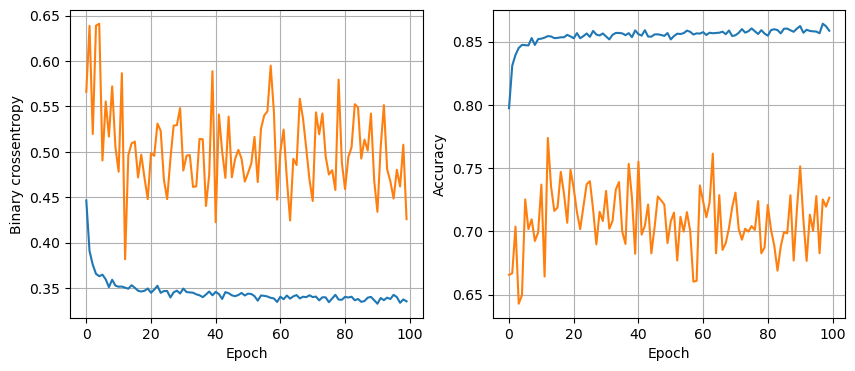

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.3297
16 nodes, dropout 0.2, lr 0.01, batch size 64


KeyboardInterrupt: 

In [82]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [83]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1375
           1       0.86      0.94      0.90      2429

    accuracy                           0.86      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

